**The Sparks Foundation GRIP :**
**Data Science and Business Analytics Intern**
Author : **Bhavesh Phaphagire**
Task 1 : **Prediction using Supervised ML**

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# imporing data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# displaying bottom 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# getting the shape of the data
df.shape

(25, 2)

In [5]:
# To return a statistcal summary of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Provides a consice summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#to check whether the dataset contains null values or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# to check the datatypes of the dataset
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
# correlation between two columns
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


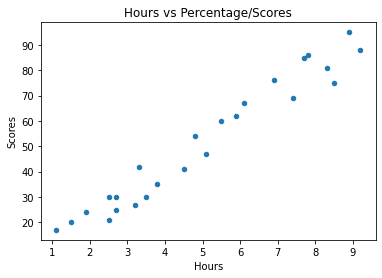

In [10]:
# plotting scatter plot
df.plot(kind = "scatter",x = "Hours" ,y = "Scores")
plt.title("Hours vs Percentage/Scores")
plt.show()

As the graph shows that number of study hours is directly propotional to the percentage/scores of the students. 

In [12]:
x_data = df.iloc[:, :-1].values
y_data = df.iloc[:, 1].values

In [13]:
# spliting data into random test and test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                            test_size=0.3, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # creating LinearRegression object
lm.fit(x_train,y_train) # fiting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

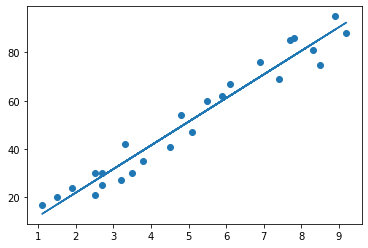

In [15]:

# Plotting the regression line
line = lm.coef_* x_data + lm.intercept_

# Plotting for the test data
plt.scatter(x_data, y_data)
plt.plot(x_data, line);
plt.show()

In [16]:
# Predicting the scores
y_pred = lm.predict(x_test) 

In [17]:
# Comparing Actual Values vs Predicted Values
predict = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
predict

,Actual Values,Predicted Values
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


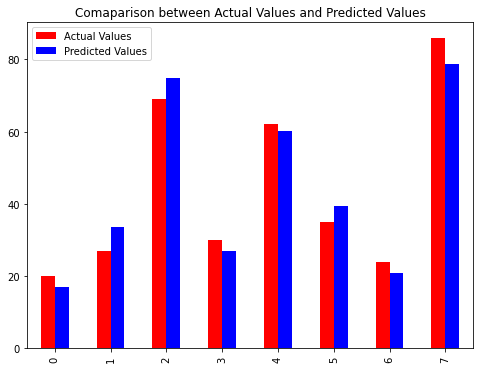

In [18]:
# Plotting bar graph 
predict.plot(kind='bar',figsize=(8,6), color=["R", "B"], title= "Comaparison between Actual Values and Predicted Values")

In [20]:
# Testing on our required data
hours = 9.25
pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [21]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mean_sq = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error is:",mean_sq)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square is:",r2)

Mean Absolute Error is: 4.419727808027651
R-Square is: 0.9568211104435257


The Accuracy od model is 95.68% and Mean Absolute Error is 4.41%
